<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gradient Descent</a></span><ul class="toc-item"><li><span><a href="#Loss-Function" data-toc-modified-id="Loss-Function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loss Function</a></span></li></ul></li><li><span><a href="#Visualize-the-Gradient-Descent" data-toc-modified-id="Visualize-the-Gradient-Descent-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualize the Gradient Descent</a></span></li><li><span><a href="#Cross-Check-with-SK-Learn" data-toc-modified-id="Cross-Check-with-SK-Learn-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cross-Check with SK-Learn</a></span></li></ul></div>

# Gradient Descent for Linear Regression 

## Data Preparation

In [3]:
import numpy as np
import pandas as pd
import random
import pylab
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
def f(x, theta0, theta1):
    """Our function, a straight line."""
    return theta0 + theta1*x

In [138]:
X = np.random.random_sample((100,))

mu, sigma = 0, 0.15
noise = np.random.normal(mu, sigma, 100)

# ...
theta0_true = 3
theta1_true = 2

# ...
y = f(X, theta0_true, theta1_true) + noise

In [139]:
print(np.c_[X, y][0:10])

[[ 0.24637819  3.47138636]
 [ 0.48295851  3.84756409]
 [ 0.3215596   3.4206151 ]
 [ 0.8136592   4.55453006]
 [ 0.97153854  4.77191134]
 [ 0.07466149  2.74994345]
 [ 0.41993143  3.75542203]
 [ 0.04284773  3.11791392]
 [ 0.46790214  3.77722375]
 [ 0.74682567  4.38643936]]


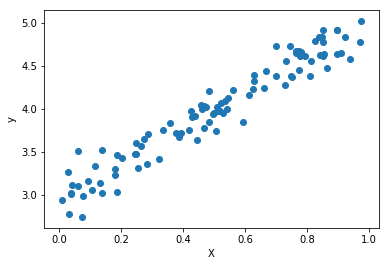

In [140]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Gradient Descent

In [142]:
def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-f(X, theta0, theta1))**2, axis=2)/2

In [502]:
def gradient_descent(x, y, alpha = 1, ep=0.0001, max_iter=1500):
    # Take N steps with learning rate alpha down the steepest gradient,
    # starting at (theta0, theta1) = (0, 0).
    m = len(X)
    theta = [np.array((0,0))]
    J = [cost_func(*theta[0])[0]]
    for i in range(max_iter-1):
        last_theta = theta[-1]
        this_theta = np.empty((2,))
        this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                        (f(x, *last_theta) - y))
        this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                        (f(x, *last_theta) - y) * x)
        theta.append(this_theta)
        J.append(cost_func(*this_theta))
        
        if i == max_iter:
            print ('Max interactions exceeded!')
            break
    
    return theta, J

In [552]:
alpha = 0.25 # learning rate
ep = 0.000001 # convergence criteria

# call gredient decent, and get intercept(=theta0) and slope(=theta1)
theta, J = gradient_descent(X, y, alpha, ep, max_iter=100)

In [553]:
theta0, theta1 = theta[-1]
print("The calculated regression function is:\ny = {} + {}*x".format(round(theta0,4), round(theta1,4)))

The calculated regression function is:
y = 3.0005 + 1.9709*x


**Pretty close !**

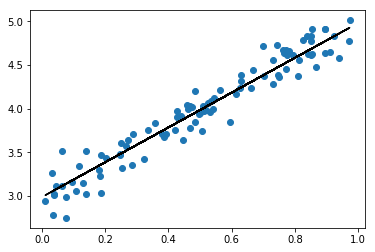

Done!


In [216]:
# plot
for i in range(X.shape[0]):
    y_predict = theta0 + theta1*X 

pylab.plot(X,y,'o')
pylab.plot(X,y_predict,'k-')
pylab.show()
print ("Done!")

### Loss Function

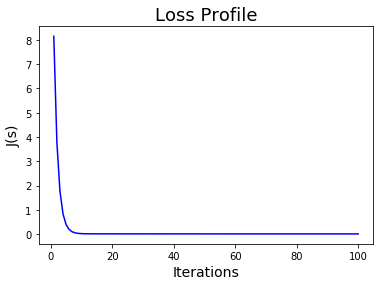

In [554]:
plt.plot(range(1, len(J)+1), J, 'b')
plt.title('Loss Profile', {'fontsize': 18})
plt.xlabel('Iterations', {'fontsize': 14})
plt.ylabel('J(s)', {'fontsize': 14})
plt.show()

## Visualize the Gradient Descent 

<img src="fit.gif" alt="gif fit" align="left" /> <br>

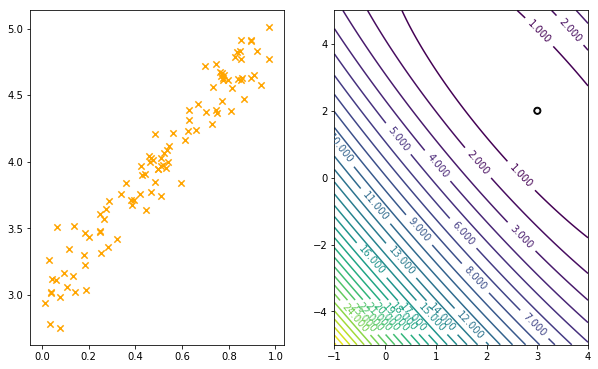

In [308]:


# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(X, y, marker='x', s=40, color='orange')

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,100)
theta1_grid = np.linspace(-5,5,100)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X_, Y_ = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X_, Y_, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

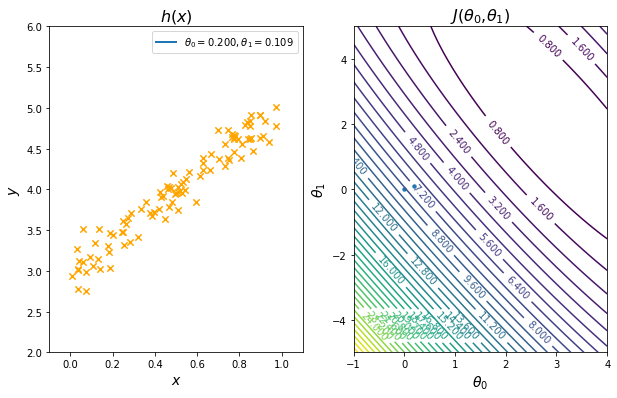

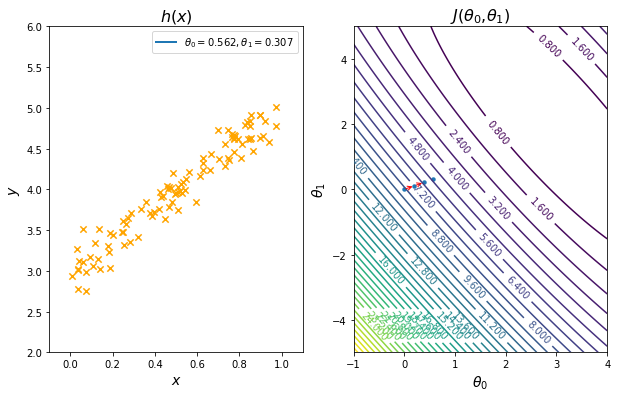

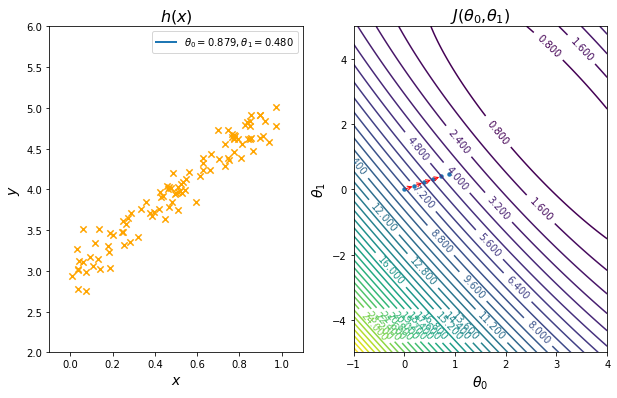

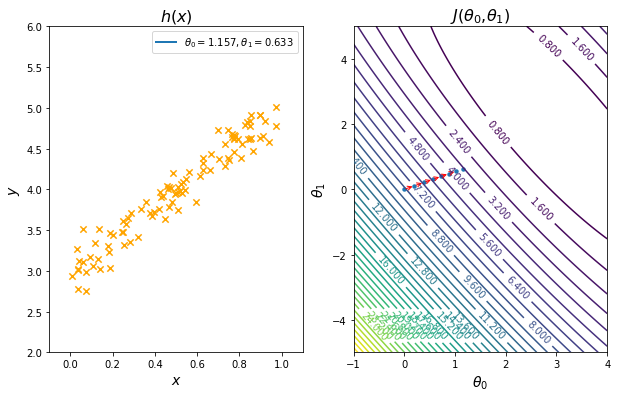

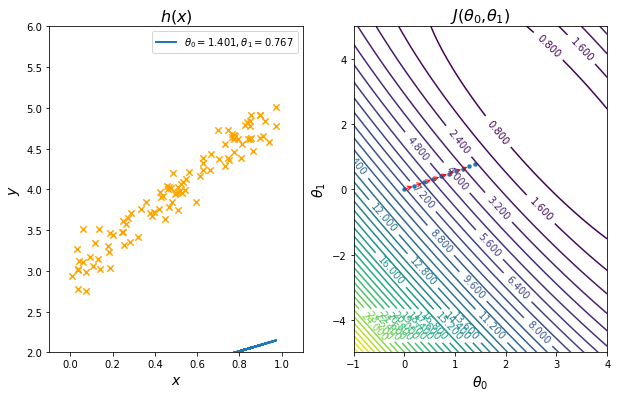

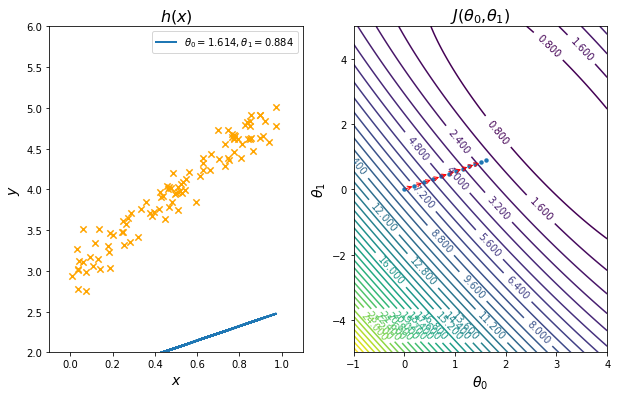

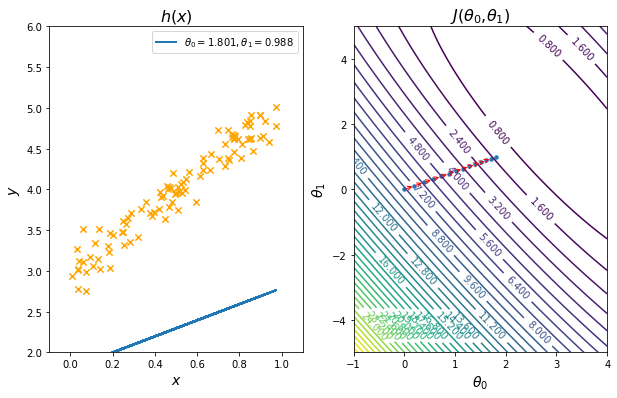

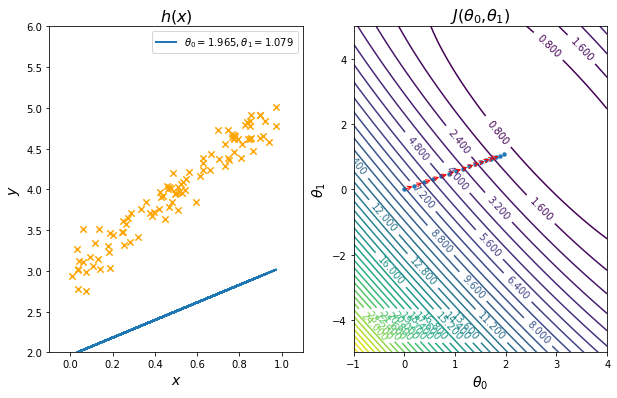

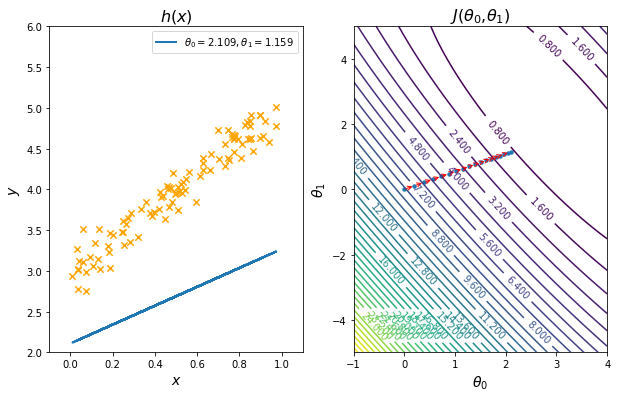

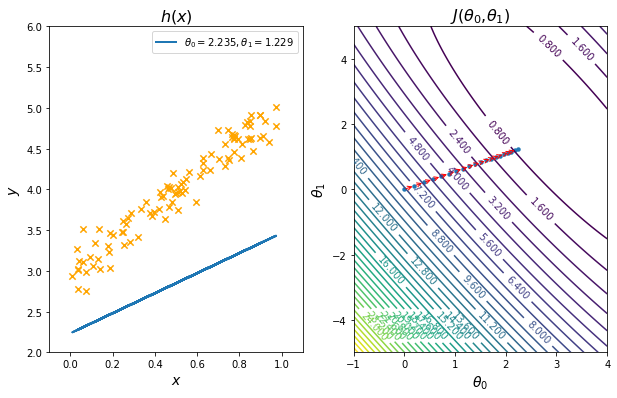

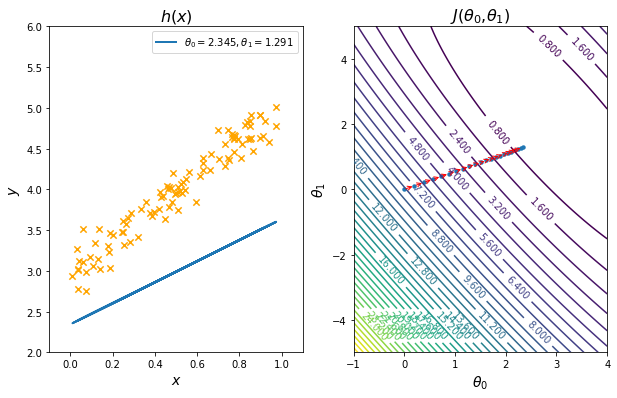

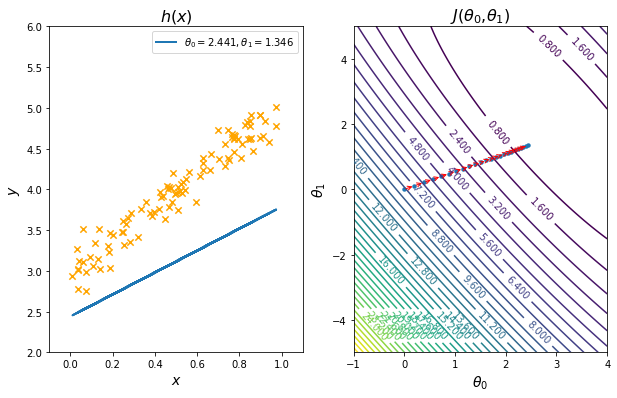

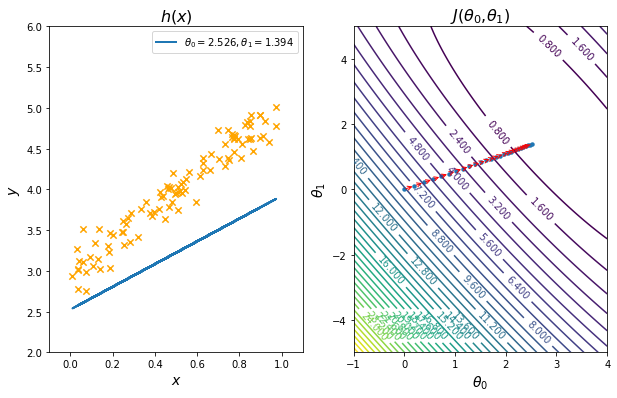

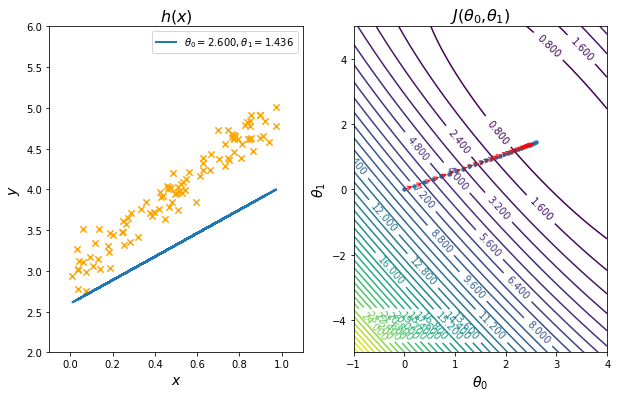

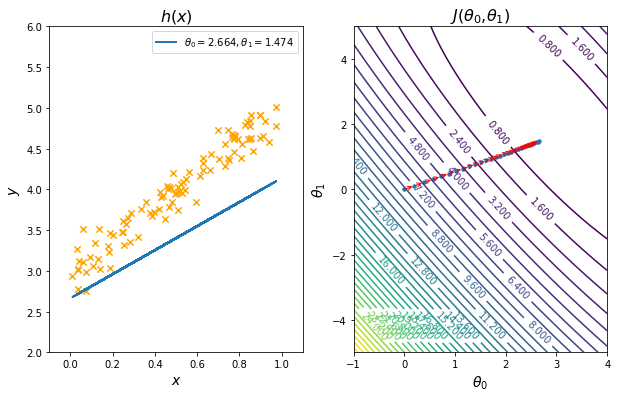

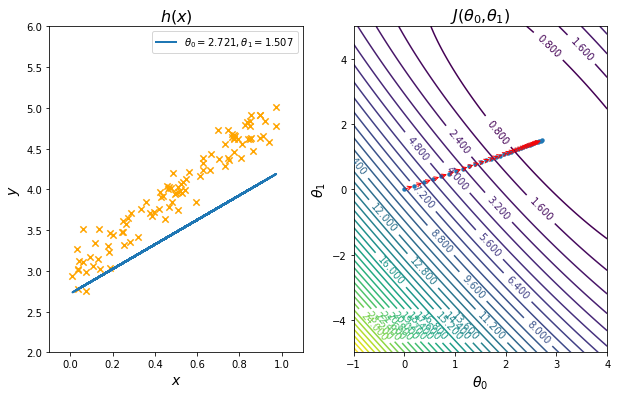

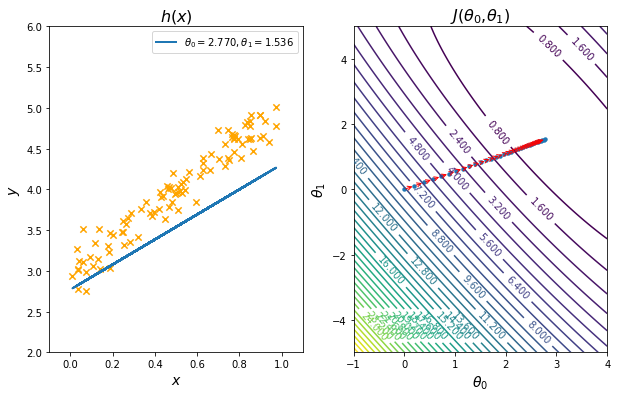

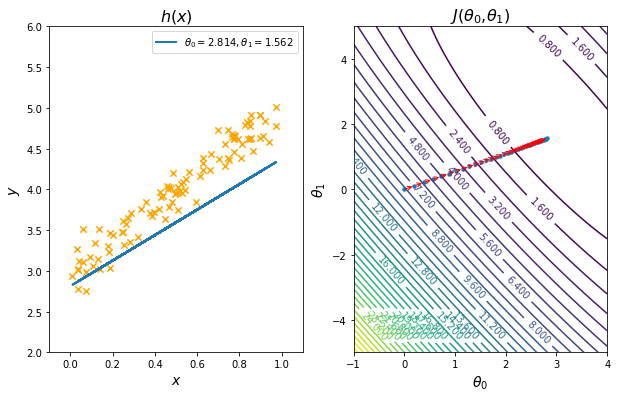

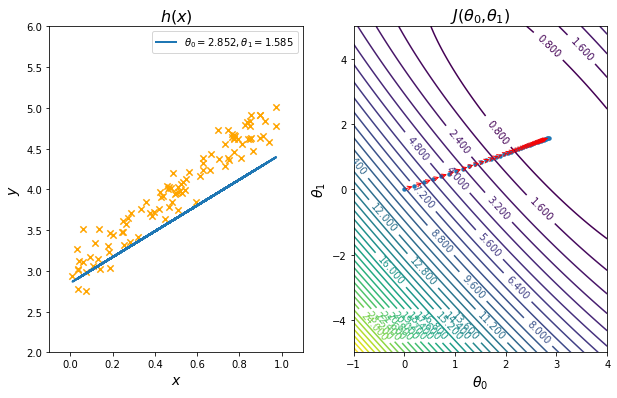

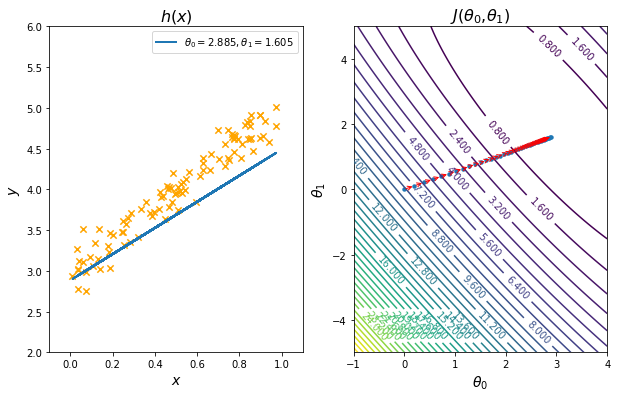

In [535]:
def lr_plot(i):  
    # The plot: LHS is the data, RHS will be the cost function.
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
    ax[0].scatter(X, y, marker='x', s=40, color='orange')

    # Annotate the cost function plot with coloured points indicating the
    # parameters chosen and red arrows indicating the steps down the gradient.
    # Also plot the fit function on the LHS data plot in a matching colour.

    # colors = ['b', 'g', 'm', 'c', 'orange']
    ax[0].plot(X, f(X, *theta[i]),  lw=2,
               label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[i]))


    # First construct a grid of (theta0, theta1) parameter pairs and their
    # corresponding cost function values.
    theta0_grid = np.linspace(-1,4,100)
    theta1_grid = np.linspace(-5,5,100)
    J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                       theta1_grid[:,np.newaxis,np.newaxis])

    # A labeled contour plot for the RHS cost function
    X_, Y_ = np.meshgrid(theta0_grid, theta1_grid)
    contours = ax[1].contour(X_, Y_, J_grid, 40)
    ax[1].clabel(contours)
    # # The target parameter values indicated on the cost function contour plot
    # ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])



    for j in range(1,i):
        ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                       arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                       va='center', ha='center')
    #     ax[0].plot(X, f(X, *theta[j]), color=colors[j], lw=2,
    #            label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
    ax[1].scatter(*zip(*theta[0:i+1]),  s=20, lw=0)

    # Labels, titles and a legend.
    ax[1].set_xlabel(r'$\theta_0$', {'fontsize': 14})
    ax[1].set_ylabel(r'$\theta_1$', {'fontsize': 14})
    ax[1].set_title(r'$J$($\theta_0$,$\theta_1$)', {'fontsize': 16})
    ax[0].set_xlabel(r'$x$', {'fontsize': 14})
    ax[0].set_ylabel(r'$y$', {'fontsize': 14})
    ax[0].set_title(r'$h$($x$)', {'fontsize': 16})
    ax[0].set_xlim(-0.1, 1.1)
    ax[0].set_ylim(2, 6)
    
    
    # Position the legend by hand so that it doesn't cover up any of the lines.
    ax[0].legend(loc=0,                 fontsize='medium')
    plt.savefig('imgs/fit' + str(i) +'.png')
    #plt.savefig('foo.png')

# for i in (2,3,6,15,30, 50, 99):
for i in range(1,40,2):
   lr_plot(i)
#lr_plot(3)

## Cross-Check with SK-Learn

In [69]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X.reshape(-1, 1),y.reshape(-1, 1))
print("sk-learn found that the function is:\n f(x) = {}*x + {}".format(round(reg.coef_[0][0],3), round(reg.intercept_[0],3)))
#pretty Close!

sk-learn found that the function is:
 f(x) = 2.953*x + 4.014


**Pretty close!** 